# [1]. Reading Data

In [181]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [182]:
final=pd.read_csv("emails.csv", skiprows=1,names=["Text","Score"])
message=final['Text'].tolist()
print(message[0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

#  [3] Preprocessing

## [3.1].  Preprocessing Review Text

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

In [183]:
# printing some random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[4900]
print(sent_4900)
print("="*50)

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [184]:
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_150 = re.sub(r"http\S+", "", sent_1500)
sent_4900 = re.sub(r"http\S+", "", sent_4900)

print(sent_0)

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [185]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1500, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_4900, 'lxml')
text = soup.get_text()
print(text)

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [186]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [187]:
sent_1500 = decontracted(sent_1500)
print(sent_1500)
print("="*50)

Subject: hello all  update :  preparations for the upcoming texas finance festival iii are about complete  and i just wanted to update you on the hotel reservations information . you  will need to make your reservation before march 20 to be assured of getting  a room in our reserved block . also , for " counting " purposes i need  everyone ' s registration form completed . many of you ( and a lot of new  faces ) have already sent them in but some may not have , so . . .  lots of fun stuff is planned so come prepared for a very relaxing and  productive weekend !  john  - announcerev . doc  john d . martin  carr p . collins chair in finance  finance department  baylor university  po box 98004  waco , tx 76798  254 - 710 - 4473 ( office )  254 - 710 - 1092 ( fax )  j _ martin @ baylor . edu  web : http : / / hsb . baylor . edu / html / martinj / home . html


In [188]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [189]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

Subject hello all update preparations for the upcoming texas finance festival iii are about complete and i just wanted to update you on the hotel reservations information you will need to make your reservation before march 20 to be assured of getting a room in our reserved block also for counting purposes i need everyone s registration form completed many of you and a lot of new faces have already sent them in but some may not have so lots of fun stuff is planned so come prepared for a very relaxing and productive weekend john announcerev doc john d martin carr p collins chair in finance finance department baylor university po box 98004 waco tx 76798 254 710 4473 office 254 710 1092 fax j martin baylor edu web http hsb baylor edu html martinj home html


In [190]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [191]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_emails = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_emails.append(sentance.strip())

100%|████████████████████████████████████████████████████████████████████████████| 5728/5728 [00:04<00:00, 1317.84it/s]


In [192]:
print(preprocessed_emails[0])
len(preprocessed_emails)

subject naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website make task much easier not promise havinq ordered iogo company automaticaily become world ieader isguite ciear without good products effective business organization practicable aim hotat nowadays market promise marketing efforts become much effective list clear benefits creativeness hand made original logos specially done reflect distinctive company image convenience logo stationery provided formats easy use content management system letsyou change website content even structure promptness see logo drafts within three business days affordability marketing break make gaps budget satisfaction guaranteed provide unlimited amount changes no extra fees surethat love result collaboration look portfolio not interested


5728

# [4] Featurization

Splitting the dataset into train, test and cv
We are taking 100000 points in total , 33 % of which is kept as dtest

In [193]:
from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X=np.asarray(preprocessed_reviews[:5728])
Y=final['Score'].values
#print(X.shape," ",Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y[:5728], test_size=0.33) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) # this is random splitting

print(X_train.shape)
print(type(X_train))

(2570,)
<class 'numpy.ndarray'>


## [4.1] BAG OF WORDS

In [194]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_countsXtrain = count_vect.transform(X_train)
final_countsXtest = count_vect.transform(X_test)
final_countsXcv = count_vect.transform(X_cv)
    
print("the shape of out text BOW vectorizer xtrain ",final_countsXtrain.get_shape())
print("the shape of out text BOW vectorizer xtest ",final_countsXtest.get_shape())
print("the shape of out text BOW vectorizer xcv ",final_countsXcv.get_shape())


#print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaldous', 'aaliyah', 'aall', 'aaron', 'aawesome', 'ab', 'abacha', 'abacus']
the shape of out text BOW vectorizer xtrain  (2570, 23005)
the shape of out text BOW vectorizer xtest  (1891, 23005)
the shape of out text BOW vectorizer xcv  (1267, 23005)


bow vectors with added feature of review length

In [195]:
from scipy.sparse import coo_matrix, hstack
xtrain_len=[]
xtest_len=[]
xcv_len=[]
for i in X_train:
    xtrain_len.append(len(i))

for i in X_test:
    xtest_len.append(len(i))

for i in X_cv:
    xcv_len.append(len(i))
xtrain_len=coo_matrix(np.reshape(np.array(xtrain_len),(-1,1)))
xtest_len=coo_matrix(np.reshape(np.array(xtest_len),(-1,1)))
xcv_len=coo_matrix(np.reshape(np.array(xcv_len),(-1,1)))
bowtrain=coo_matrix(final_countsXtrain)
bowtest=coo_matrix(final_countsXtest)
bowcv=coo_matrix(final_countsXcv)
bowtrain=hstack([final_countsXtrain,xtrain_len])
bowtest=hstack([final_countsXtest,xtest_len])
bowcv=hstack([final_countsXcv,xcv_len])
print(bowtrain.shape)
print(bowtest.shape)
print(bowcv.shape)

(2570, 23006)
(1891, 23006)
(1267, 23006)


## [4.3] TF-IDF

In [196]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(X_train)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idfXtrain = tf_idf_vect.transform(X_train)
final_tf_idfXtest = tf_idf_vect.transform(X_test)
final_tf_idfXcv = tf_idf_vect.transform(X_cv)
#print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer xtrain ",final_tf_idfXtrain.get_shape())
print("the shape of out text TFIDF vectorizer xtest ",final_tf_idfXtest.get_shape())
print("the shape of out text TFIDF vectorizer xcv ",final_tf_idfXcv.get_shape())
#print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aa', 'ability', 'able', 'able deliver', 'able make', 'absence', 'absolutely', 'abstract', 'abuse', 'ac']
the shape of out text TFIDF vectorizer xtrain  (2570, 5729)
the shape of out text TFIDF vectorizer xtest  (1891, 5729)
the shape of out text TFIDF vectorizer xcv  (1267, 5729)


tfidf vectors with added feature of review length

In [197]:
tfidftrain=coo_matrix(final_tf_idfXtrain)
tfidftest=coo_matrix(final_tf_idfXtest)
tfidfcv=coo_matrix(final_tf_idfXcv)
tfidftrain=hstack([final_tf_idfXtrain,xtrain_len])
tfidftest=hstack([final_tf_idfXtest,xtest_len])
tfidfcv=hstack([final_tf_idfXcv,xcv_len])
print(tfidftrain.shape)
print(tfidftest.shape)
print(tfidfcv.shape)

(2570, 5730)
(1891, 5730)
(1267, 5730)


# [5] Assignment 4: Apply Naive Bayes

<ol>
    <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using values of `feature_log_prob_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Applying Multinomial Naive Bayes

## [5.1] Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

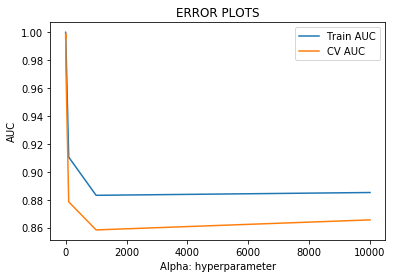

In [198]:
# Please write all the code with proper documentation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x_train=final_countsXtrain
x_test=final_countsXtest
x_cv=final_countsXcv
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""
#print(final_countsXtrain.toarray().shape)
train_auc = []
cv_auc = []
A = [0.000001,0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
for i in A:
    model1 = MultinomialNB(alpha=i)
    model1.fit(x_train, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  model1.predict_proba(x_train)[:,1]
    y_cv_pred =  model1.predict_proba(x_cv)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(A, train_auc, label='Train AUC')
plt.plot(A, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

0.01


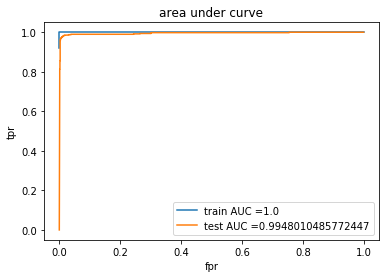

Train confusion matrix
[[1991    0]
 [   0  579]]
Test confusion matrix
[[1401    4]
 [  26  460]]


In [199]:
from sklearn.metrics import roc_curve, auc

best_a = A[cv_auc.index(max(cv_auc))]
print(best_a)
model1 = MultinomialNB(alpha=best_a)
model1.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, model1.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model1.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("area under curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, model1.predict(x_train)))
print("Test confusion matrix")
print(confusion_matrix(y_test, model1.predict(x_test)))

### [5.1.1] Top 10 important features of positive class from<font color='red'> SET 1</font>

In [200]:
# Please write all the code with proper documentation
fi=np.array(model1.feature_log_prob_)
print(fi.shape)
top=np.array(sorted(fi[1,:]))
toppos=top[len(top)-10:]
top_pos_index=[]
top_pos_feat=[]
for i in toppos:
    top_pos_feat.append(count_vect.get_feature_names()[fi[1,:].tolist().index(i)])
    top_pos_index.append(fi[1,:].tolist().index(i))
print(top_pos_index)
print("Top 10 important features of positive class are")
print(top_pos_feat)

(2, 23005)
[13155, 9539, 13794, 6493, 10071, 2677, 3856, 3764, 13885, 19733]
Top 10 important features of positive class are
['money', 'http', 'no', 'email', 'information', 'business', 'company', 'com', 'not', 'subject']


[5.1.2] Top 10 important features of negative class from SET 1

In [203]:
# Please write all the code with proper documentation
fi=np.array(model1.feature_log_prob_)
print(fi.shape)
top=np.array(sorted(fi[0,:]))
topneg=top[len(top)-10:]
top_neg_index=[]
top_neg_feat=[]
for i in topneg:
    top_neg_feat.append(count_vect.get_feature_names()[fi[0,:].tolist().index(i)])
    top_neg_index.append(fi[0,:].tolist().index(i))
print(top_neg_index)
print("Top 10 important features of negative class are")

print(top_neg_feat)

(2, 23005)
[3084, 22605, 15382, 3764, 10966, 9499, 21857, 19733, 6269, 6723]
Top 10 important features of negative class are
['cc', 'would', 'please', 'com', 'kaminski', 'hou', 'vince', 'subject', 'ect', 'enron']


## [5.2] Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

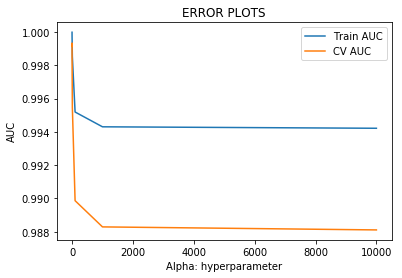

In [204]:
# Please write all the code with proper documentation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x_train=final_tf_idfXtrain
x_test=final_tf_idfXtest
x_cv=final_tf_idfXcv
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""
#print(final_countsXtrain.toarray().shape)
train_auc = []
cv_auc = []
A = [0.000001,0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
for i in A:
    model2 = MultinomialNB(alpha=i)
    model2.fit(x_train, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  model2.predict_proba(x_train)[:,1]
    y_cv_pred =  model2.predict_proba(x_cv)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(A, train_auc, label='Train AUC')
plt.plot(A, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

0.001


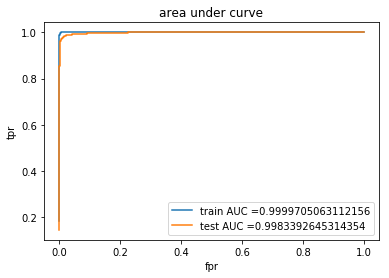

Train confusion matrix
[[1990    1]
 [  11  568]]
Test confusion matrix
[[1404    1]
 [  44  442]]


In [205]:
from sklearn.metrics import roc_curve, auc

best_a = A[cv_auc.index(max(cv_auc))]
print(best_a)
model2 = MultinomialNB(alpha=best_a)
model2.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, model2.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model2.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("area under curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, model2.predict(x_train)))
print("Test confusion matrix")
print(confusion_matrix(y_test, model2.predict(x_test)))

### [5.2.1] Top 10 important features of positive class from<font color='red'> SET 2</font>

In [206]:
# Please write all the code with proper documentation
fi=np.array(model2.feature_log_prob_)
print(fi.shape)
top=np.array(sorted(fi[1,:]))
toppos=top[len(top)-10:]
top_pos_index=[]
top_pos_feat=[]
for i in toppos:
    top_pos_feat.append(tf_idf_vect.get_feature_names()[fi[1,:].tolist().index(i)])
    top_pos_index.append(fi[1,:].tolist().index(i))
print(top_pos_index)
print("Top 10 important features of positive class are")
print(top_pos_feat)

(2, 5729)
[3496, 3226, 5556, 4464, 2314, 4704, 770, 807, 3381, 4894]
Top 10 important features of positive class are
['online', 'money', 'website', 'save', 'http', 'software', 'click', 'com', 'not', 'subject']


### [5.2.2] Top 10 important features of negative class from<font color='red'> SET 2</font>

In [209]:
# Please write all the code with proper documentation
fi=np.array(model2.feature_log_prob_)
print(fi.shape)
top=np.array(sorted(fi[0,:]))
topneg=top[len(top)-10:]
top_neg_index=[]
top_neg_feat=[]
for i in topneg:
    top_neg_feat.append(tf_idf_vect.get_feature_names()[fi[0,:].tolist().index(i)])
    top_neg_index.append(fi[0,:].tolist().index(i))
print(top_neg_index)
print("Top 10 important features of negitive class are")
print(top_neg_feat)

(2, 5729)
[807, 3760, 1422, 2627, 2286, 2285, 4894, 5445, 1568, 1416]
Top 10 important features of negitive class are
['com', 'please', 'ect ect', 'kaminski', 'hou ect', 'hou', 'subject', 'vince', 'enron', 'ect']


Applying Naive Bayes on BOW after adding feature

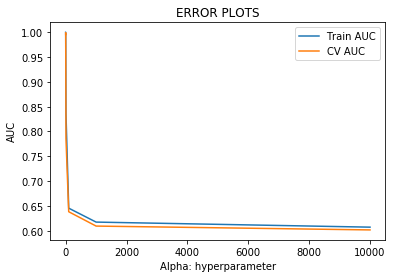

In [210]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x_train=bowtrain
x_test=bowtest
x_cv=bowcv
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""
#print(final_countsXtrain.toarray().shape)
train_auc = []
cv_auc = []
A = [0.000001,0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
for i in A:
    model3 = MultinomialNB(alpha=i)
    model3.fit(x_train, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  model3.predict_proba(x_train)[:,1]
    y_cv_pred =  model3.predict_proba(x_cv)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(A, train_auc, label='Train AUC')
plt.plot(A, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

0.01


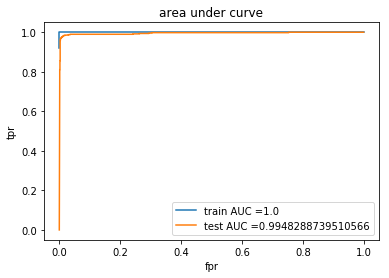

Train confusion matrix
[[1991    0]
 [   0  579]]
Test confusion matrix
[[1401    4]
 [  25  461]]


In [211]:
from sklearn.metrics import roc_curve, auc

best_a = A[cv_auc.index(max(cv_auc))]
print(best_a)
model3 = MultinomialNB(alpha=best_a)
model3.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, model3.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model3.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("area under curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, model3.predict(x_train)))
print("Test confusion matrix")
print(confusion_matrix(y_test, model3.predict(x_test)))

Applying Naive Bayes on TFIDF after adding feature

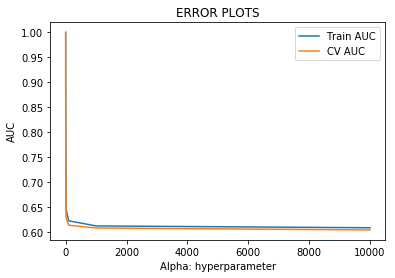

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x_train=tfidftrain
x_test=tfidftest
x_cv=tfidfcv
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""
#print(final_countsXtrain.toarray().shape)
train_auc = []
cv_auc = []
A = [0.000001,0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
for i in A:
    model = MultinomialNB(alpha=i)
    model.fit(x_train, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_train_pred =  model.predict_proba(x_train)[:,1]
    y_cv_pred =  model.predict_proba(x_cv)[:,1]
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(A, train_auc, label='Train AUC')
plt.plot(A, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

0.0001


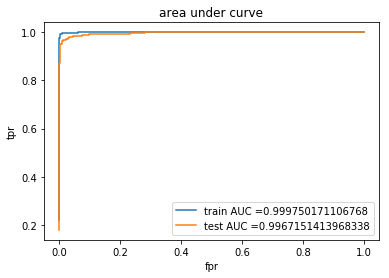

Train confusion matrix
[[1990    1]
 [  19  560]]
Test confusion matrix
[[1404    1]
 [  57  429]]


In [213]:
from sklearn.metrics import roc_curve, auc

best_a = A[cv_auc.index(max(cv_auc))]
print(best_a)
model4 = MultinomialNB(alpha=best_a)
model4.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, model4.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model4.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("area under curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, model4.predict(x_train)))
print("Test confusion matrix")
print(confusion_matrix(y_test, model4.predict(x_test)))

# [6] Conclusions

In [214]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyperparameter -alpha ", "AUC"]

x.add_row(["BOW", "Multinomial NaiveBayes", 1, 0.998])
x.add_row(["TFIDF", "Multinomial NaiveBayes", 0.01, 0.999])
x.add_row(["BOW with feature eng ", "Multinomial NaiveBayes", 0.1, 0.998])
x.add_row(["TFIDF with feature eng  ","Multinomial NaiveBayes", 0.001, 0.998])

print(x)

+--------------------------+------------------------+------------------------+-------+
|        Vectorizer        |         Model          | Hyperparameter -alpha  |  AUC  |
+--------------------------+------------------------+------------------------+-------+
|           BOW            | Multinomial NaiveBayes |           1            | 0.998 |
|          TFIDF           | Multinomial NaiveBayes |          0.01          | 0.999 |
|  BOW with feature eng    | Multinomial NaiveBayes |          0.1           | 0.998 |
| TFIDF with feature eng   | Multinomial NaiveBayes |         0.001          | 0.998 |
+--------------------------+------------------------+------------------------+-------+


In [215]:
def preprocess(sentance):    
    preprocessed_email=[]
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_email.append(sentance.strip())
    return preprocessed_email
def findclass(x):
    x=preprocess(x)
    x=np.asarray(x)
    l = tf_idf_vect.transform(x)
    c=model2.predict(l)
    return c[0]
    

In [216]:
x=input("Enter the message")
print()
print()
print()
print("-----------------------------------------------")
c=findclass(x)
if c==1:
    print("The message is not a spam")
elif c==0:
    print("The message is a spam")

Enter the message"Subject: news : aurora 5 . 2 update  aurora version 5 . 2  - the fastest model just got faster -  epis announces the release of aurora , version 5 . 2  aurora the electric market price forecasting tool is already  legendary for power and speed . we ' ve combined a powerful chronological  dispatch model with the capability to simulate the market from 1  day to 25 + years . add to that a risk analysis section , powered by user  selectable monte carlo & / or latin hypercube modeling , enough  portfolio analysis power to please the toughest critic , & inputs and  outputs from standard excel & access tables and you ' ve got one of most  powerful tools in the market .  just a few months ago we expanded our emissions modeling  capabilities , added our quarterly database update , increased the speed  of the entire model , and made  but that wasn ' t enough .  we ' ve done it again . some of the operations that we ' ve  included . . .  two new reporting enhancements .  the fir